## Code used for Taylor et al. (2024)
### 'Canyon-fills in unprecidented detail: The importance of multiple flow processes in thin-bedded confined overbank successions'

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
# plt.style.use('seaborn')

%matplotlib inline

In [2]:
df = pd.read_csv('data/pb_palaeocurrents_all.csv') # load data, 
df2 = pd.read_csv('data/pb_palaeocurrents_overbank.csv') # load data


bins = 24 ## Set how many bins
col_dir = 'direction' ## Column name containing the paleocurrent directions
sns.set_style("whitegrid")

df[col_dir] = df[col_dir].astype('int')
df2[col_dir] = df2[col_dir].astype('int')

# AXIS
axis = df[(df.environment == 'axis')]
axis_ripples = df[(df.environment == 'axis') & (df.type == 'ripples')]
axis_flutes = df[(df.environment == 'axis') & (df.type == 'flutes')]
axis_imbrications = df[(df.environment == 'axis') & (df.type == 'imbrication')]


#MARGIN
margin = df[(df.environment == 'margin')]
margin_ripples = df[(df.environment == 'margin') & (df.type == 'ripples')]
margin_grooves = df[(df.environment == 'margin') & (df.type == 'grooves')] 
margin_flutes = df[(df.environment == 'margin') & (df.type == 'flutes')]
margin_imbrications = df[(df.environment == 'margin') & (df.type == 'imbrication')]

#OVERBANK
overbank = df[(df.environment == 'overbank')]
overbank_ripples = df[(df.environment == 'overbank') & (df.type == 'ripples')]
overbank_grooves = df[(df.environment == 'overbank') & (df.type == 'grooves')] 
overbank_flutes = df[(df.environment == 'overbank') & (df.type == 'flutes')]
overbank_imbrications = df[(df.environment == 'overbank') & (df.type == 'imbrication')]

#OVERBANK A
overbank_A = df2[(df2.cluster == 'A')]
overbank_A_ripples = df2[(df2.cluster == 'A') & (df2.type == 'ripples')]
overbank_A_grooves = df2[(df2.cluster == 'A') & (df2.type == 'grooves')]

#OVERBANK B
overbank_B = df2[(df2.cluster == 'B')]
overbank_B_ripples = df2[(df2.cluster == 'B') & (df2.type == 'ripples')]
overbank_B_imbrication = df2[(df2.cluster == 'B') & (df2.type == 'imbrication')]

#OVERBANK C
overbank_C = df2[(df2.cluster == 'C')]
overbank_C_ripples = df2[(df2.cluster == 'C') & (df2.type == 'ripples')]
overbank_C_imbrication = df2[(df2.cluster == 'C') & (df2.type == 'imbrication')]




In [3]:
#Conversion to rose-diagram input

directions = df[col_dir].to_numpy()

bin_int = 360/bins

bin_classes = []
binn = []
counts = []
counts_perc = []

for x in range(bins):
    #Define bin limits:
    bin_classes.append(((x*bin_int),((x+1)*bin_int)))
    #Seperate the measurements into bins, using a ≤ x < b :
    binn.append(np.array([(directions[(directions >= (x)*bin_int) & (directions < (x+1)*bin_int)])]))
    #Count how many values in each bin, using a ≤ x < b :
    counts.append(np.count_nonzero((directions >= (x)*bin_int) & (directions < (x+1)*bin_int))) 
    
#Convert number of counts to percentage of total counts in each bin:
for x in counts:
    counts_perc.append(x/sum(counts)*100)

# All Data

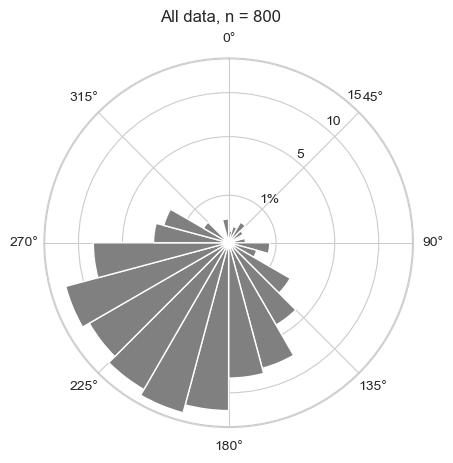

In [4]:
# Plotting with equal area
### Ploting with dataset-dependent radius
    
### Calculate the unit radius (r_1%), depending on largest bin:
r_unit = max(counts_perc)/math.sqrt(max(counts_perc))
### Calculate radii corresponding to each bin, using r_f% = r_1% * f%^0.5:
radii = []
for x in counts_perc:
    radii.append(r_unit * math.sqrt(x))

### Define r or y axis tickmarks:
r_ticks = [r_unit]
r_tickslabels = ['1%']
r_ticksinterval = 5 #Sets the spacing between radius ticks
for x in range(0,int(max(counts_perc))+r_ticksinterval,r_ticksinterval):
    r_ticks.append(r_unit*math.sqrt(x))
    r_tickslabels.append(x)

theta = np.linspace(0.0, 2 * np.pi, bins, endpoint=False)+(np.pi/bins) #Last bracketed term sets of the bin starting point
width = (2*np.pi)/bins #Calculates bin width depending on number of bins
ax = plt.subplot(111, projection='polar')
ax.bar(theta, radii, width=width, bottom=0.0, color='grey') #Plots equal-area
ax.set_theta_zero_location("N")  # theta=0 at the top
ax.set_theta_direction(-1)  # theta increasing clockwise

ax.set_yticks(r_ticks)
ax.set_yticklabels(r_tickslabels)
ax.set_rlabel_position(40)  # Move radial labels away from plotted line
plt.suptitle('All data, n = ' + str(len(directions)))

plt.show()

In [5]:
## Convert measurement types to general classes
print(df['type'].unique())
df.loc[df['type'].str.contains('imbrication'), 'type_gen'] = 'imbrication'
df.loc[df['type'].str.contains('grooves'), 'type_gen'] = 'grooves'
df.loc[df['type'].str.contains('ripples'), 'type_gen'] = 'ripples'
df.loc[df['type'].str.contains('flutes'), 'type_gen'] = 'flutes'
print(df['type_gen'].unique())

imbrication_dir = df[df['type_gen'].str.contains('imbrication')][col_dir].to_numpy()
ripple_dir = df[df['type_gen'].str.contains('ripples')][col_dir].to_numpy()
flute_dir = df[df['type_gen'].str.contains('flutes')][col_dir].to_numpy()
bin_int = 360/bins

['flutes' 'imbrication' 'ripples' 'grooves']
['flutes' 'imbrication' 'ripples' 'grooves']


# Axis

Flutes, n = 17
Ripples, n = 27
Imbrication, n = 396


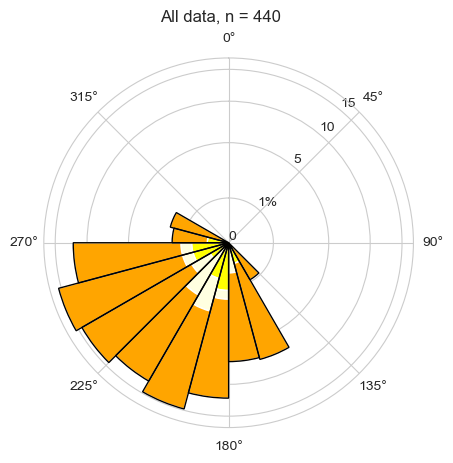

In [6]:
#### AXIS 

bin_int = 360/bins

fig= plt.figure()

## All data as base
directions = axis.direction
bin_classes = []
binn = []
counts_tot = []
counts_perc = []
for x in range(bins):
    #Define bin limits:
    bin_classes.append(((x*bin_int),((x+1)*bin_int)))
    #Seperate the measurements into bins, using a ≤ x < b :
    binn.append(np.array([(directions[(directions >= (x)*bin_int) & (directions < (x+1)*bin_int)])]))
    #Count how many values in each bin, using a ≤ x < b :
    counts_tot.append(np.count_nonzero((directions >= (x)*bin_int) & (directions < (x+1)*bin_int))) 
#Convert number of counts to percentage of total counts in each bin:
for x in counts_tot:
    counts_perc.append(x/sum(counts_tot)*100)
### Plotting with equal area
### Ploting with dataset-dependent radius
### Calculate the unit radius (r_1%), depending on largest bin:
r_unit = max(counts_perc)/math.sqrt(max(counts_perc))
### Calculate radii corresponding to each bin, using r_f% = r_1% * f%^0.5:
radii = []
for x in counts_perc:
    radii.append(r_unit * math.sqrt(x))
### Define r or y axis tickmarks:
r_ticks = [r_unit]
r_tickslabels = ['1%']
r_ticksinterval = 5 #Sets the spacing between radius ticks
for x in range(0,int(max(counts_perc))+r_ticksinterval,r_ticksinterval):
    r_ticks.append(r_unit*math.sqrt(x))
    r_tickslabels.append(x)
theta = np.linspace(0.0, 2 * np.pi, bins, endpoint=False)+(np.pi/bins) #Last bracketed term sets of the bin starting point
width = (2*np.pi)/bins #Calculates bin width depending on number of bins
ax = plt.subplot(111, projection='polar')
ax.bar(theta, radii, width=width, bottom=0.0, fill=False, edgecolor='black', linewidth=1, zorder=10) #Plots equal-area
ax.set_theta_zero_location("N")  # theta=0 at the top
ax.set_theta_direction(-1)  # theta increasing clockwise
ax.set_yticks(r_ticks)
ax.set_yticklabels(r_tickslabels)
ax.set_rlabel_position(40)  # Move radial labels away from plotted line
plt.suptitle('All data, n = ' + str(len(directions)))

bottom = np.zeros(bins) #Set the starting point for the radial bars at origin (0.0)

## 1
directions = axis_flutes.direction
# bin_classes = []
binn = []
counts = []
counts_perc = []
for x in range(bins):
#     #Define bin limits:
#     bin_classes.append(((x*bin_int),((x+1)*bin_int)))
    #Seperate the measurements into bins, using a ≤ x < b :
    binn.append(np.array([(directions[(directions >= (x)*bin_int) & (directions < (x+1)*bin_int)])]))
    #Count how many values in each bin, using a ≤ x < b :
    counts.append(np.count_nonzero((directions >= (x)*bin_int) & (directions < (x+1)*bin_int))) 
#Convert number of counts to percentage of total counts in each bin:
for x in counts:
    counts_perc.append(x/sum(counts_tot)*100)
### Plotting with equal area
### Ploting with dataset-dependent radius
### Calculate radii corresponding to each bin, using r_f% = r_1% * f%^0.5:
radii = []
for x in counts_perc:
    radii.append(r_unit * math.sqrt(x))
theta = np.linspace(0.0, 2 * np.pi, bins, endpoint=False)+(np.pi/bins) #Last bracketed term sets of the bin starting point
plt.bar(theta, radii, width=width, bottom=bottom, color = 'yellow', alpha=1) #Plots equal-area
print('Flutes, n = ' + str(len(directions)))
bottom = radii #Set the starting point for the bars on top of previous class

## 2
directions = axis_ripples.direction
# bin_classes = []
binn = []
counts = []
counts_perc1 = []
for x in range(bins):
#     #Define bin limits:
#     bin_classes.append(((x*bin_int),((x+1)*bin_int)))
    #Seperate the measurements into bins, using a ≤ x < b :
    binn.append(np.array([(directions[(directions >= (x)*bin_int) & (directions < (x+1)*bin_int)])]))
    #Count how many values in each bin, using a ≤ x < b :
    counts.append(np.count_nonzero((directions >= (x)*bin_int) & (directions < (x+1)*bin_int))) 
#Convert number of counts to percentage of total counts in each bin:
for x in counts:
    counts_perc1.append(x/sum(counts_tot)*100)
counts_perc = [x + y for x, y in zip(counts_perc, counts_perc1)] #Calculate radius extent for this class by summing counts with previous classes
### Plotting with equal area
### Ploting with dataset-dependent radius
### Calculate radii corresponding to each bin, using r_f% = r_1% * f%^0.5:
radii1 = []
for x in counts_perc:
    radii1.append(r_unit * math.sqrt(x)) 
radii = [x - y for x, y in zip(radii1, radii)] #Calculate the radius to add to the bottom value for each bin, in order to plot to the true radius
theta = np.linspace(0.0, 2 * np.pi, bins, endpoint=False)+(np.pi/bins) #Last bracketed term sets of the bin starting point
plt.bar(theta, radii, width=width, bottom=bottom, color = 'lightyellow', alpha = 1) #Plots equal-area
print('Ripples, n = ' + str(len(directions)))
bottom = radii1 #Set the starting point for the bars on top of previous class

## 3
directions = axis_imbrications.direction
# bin_classes = []
binn = []
counts = []
counts_perc1 = []
for x in range(bins):
#     #Define bin limits:
#     bin_classes.append(((x*bin_int),((x+1)*bin_int)))
    #Seperate the measurements into bins, using a ≤ x < b :
    binn.append(np.array([(directions[(directions >= (x)*bin_int) & (directions < (x+1)*bin_int)])]))
    #Count how many values in each bin, using a ≤ x < b :
    counts.append(np.count_nonzero((directions >= (x)*bin_int) & (directions < (x+1)*bin_int))) 
#Convert number of counts to percentage of total counts in each bin:
for x in counts:
    counts_perc1.append(x/sum(counts_tot)*100)
counts_perc = [x + y for x, y in zip(counts_perc, counts_perc1)] #Calculate radius extent for this class by summing counts with previous classes
### Plotting with equal area
### Ploting with dataset-dependent radius
### Calculate radii corresponding to each bin, using r_f% = r_1% * f%^0.5:
radii2 = []
for x in counts_perc:
    radii2.append(r_unit * math.sqrt(x)) 
radii = [x - y for x, y in zip(radii2, radii1)] #Calculate the radius to add to the bottom value for each bin, in order to plot to the true radius
theta = np.linspace(0.0, 2 * np.pi, bins, endpoint=False)+(np.pi/bins) #Last bracketed term sets of the bin starting point
plt.bar(theta, radii, width=width, bottom=bottom, color = 'orange', alpha=1) #Plots equal-area
print('Imbrication, n = ' + str(len(directions)))
bottom = radii2 #Set the starting point for the bars on top of previous class

plt.show()
fig.savefig('figs/pb_palaeocurrents_axis.eps')

# Margin

Grooves, n = 0
Flutes, n = 3
Imbrication, n = 45
Ripples, n = 81


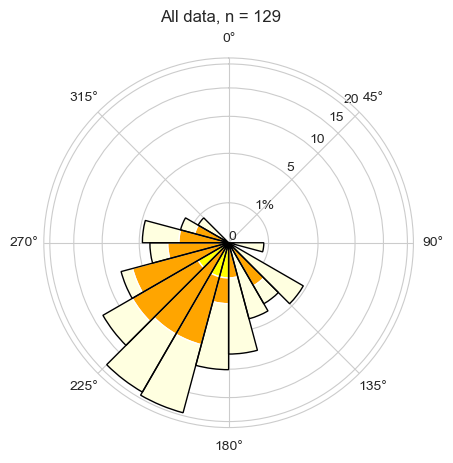

In [7]:
#### MARGIN 

bin_int = 360/bins

fig= plt.figure()

## All data as base
directions = margin.direction
bin_classes = []
binn = []
counts_tot = []
counts_perc = []
for x in range(bins):
    #Define bin limits:
    bin_classes.append(((x*bin_int),((x+1)*bin_int)))
    #Seperate the measurements into bins, using a ≤ x < b :
    binn.append(np.array([(directions[(directions >= (x)*bin_int) & (directions < (x+1)*bin_int)])]))
    #Count how many values in each bin, using a ≤ x < b :
    counts_tot.append(np.count_nonzero((directions >= (x)*bin_int) & (directions < (x+1)*bin_int))) 
#Convert number of counts to percentage of total counts in each bin:
for x in counts_tot:
    counts_perc.append(x/sum(counts_tot)*100)
### Plotting with equal area
### Ploting with dataset-dependent radius
### Calculate the unit radius (r_1%), depending on largest bin:
r_unit = max(counts_perc)/math.sqrt(max(counts_perc))
### Calculate radii corresponding to each bin, using r_f% = r_1% * f%^0.5:
radii = []
for x in counts_perc:
    radii.append(r_unit * math.sqrt(x))
### Define r or y axis tickmarks:
r_ticks = [r_unit]
r_tickslabels = ['1%']
r_ticksinterval = 5 #Sets the spacing between radius ticks
for x in range(0,int(max(counts_perc))+r_ticksinterval,r_ticksinterval):
    r_ticks.append(r_unit*math.sqrt(x))
    r_tickslabels.append(x)
theta = np.linspace(0.0, 2 * np.pi, bins, endpoint=False)+(np.pi/bins) #Last bracketed term sets of the bin starting point
width = (2*np.pi)/bins #Calculates bin width depending on number of bins
ax = plt.subplot(111, projection='polar')
ax.bar(theta, radii, width=width, bottom=0.0, fill=False, edgecolor='black', linewidth=1, zorder=10) #Plots equal-area
ax.set_theta_zero_location("N")  # theta=0 at the top
ax.set_theta_direction(-1)  # theta increasing clockwise
ax.set_yticks(r_ticks)
ax.set_yticklabels(r_tickslabels)
ax.set_rlabel_position(40)  # Move radial labels away from plotted line
plt.suptitle('All data, n = ' + str(len(directions)))

bottom = np.zeros(bins) #Set the starting point for the radial bars at origin (0.0)

## 0
directions = margin_grooves.direction
# bin_classes = []
binn = []
counts = []
counts_perc = []
for x in range(bins):
#     #Define bin limits:
#     bin_classes.append(((x*bin_int),((x+1)*bin_int)))
    #Seperate the measurements into bins, using a ≤ x < b :
    binn.append(np.array([(directions[(directions >= (x)*bin_int) & (directions < (x+1)*bin_int)])]))
    #Count how many values in each bin, using a ≤ x < b :
    counts.append(np.count_nonzero((directions >= (x)*bin_int) & (directions < (x+1)*bin_int))) 
#Convert number of counts to percentage of total counts in each bin:
for x in counts:
    counts_perc.append(x/sum(counts_tot)*100)
### Plotting with equal area
### Ploting with dataset-dependent radius
### Calculate radii corresponding to each bin, using r_f% = r_1% * f%^0.5:
radii = []
for x in counts_perc:
    radii.append(r_unit * math.sqrt(x))
theta = np.linspace(0.0, 2 * np.pi, bins, endpoint=False)+(np.pi/bins) #Last bracketed term sets of the bin starting point
plt.bar(theta, radii, width=width, bottom=bottom, color = 'grey', alpha=1) #Plots equal-area
print('Grooves, n = ' + str(len(directions)))
bottom = radii #Set the starting point for the bars on top of previous class

## 1
directions = margin_flutes.direction
# bin_classes = []
binn = []
counts = []
counts_perc1 = []
for x in range(bins):
#     #Define bin limits:
#     bin_classes.append(((x*bin_int),((x+1)*bin_int)))
    #Seperate the measurements into bins, using a ≤ x < b :
    binn.append(np.array([(directions[(directions >= (x)*bin_int) & (directions < (x+1)*bin_int)])]))
    #Count how many values in each bin, using a ≤ x < b :
    counts.append(np.count_nonzero((directions >= (x)*bin_int) & (directions < (x+1)*bin_int))) 
#Convert number of counts to percentage of total counts in each bin:
for x in counts:
    counts_perc1.append(x/sum(counts_tot)*100)
counts_perc = [x + y for x, y in zip(counts_perc, counts_perc1)] #Calculate radius extent for this class by summing counts with previous classes
### Plotting with equal area
### Ploting with dataset-dependent radius
### Calculate radii corresponding to each bin, using r_f% = r_1% * f%^0.5:
radii1 = []
for x in counts_perc:
    radii1.append(r_unit * math.sqrt(x)) 
radii = [x - y for x, y in zip(radii1, radii)] #Calculate the radius to add to the bottom value for each bin, in order to plot to the true radius
theta = np.linspace(0.0, 2 * np.pi, bins, endpoint=False)+(np.pi/bins) #Last bracketed term sets of the bin starting point
plt.bar(theta, radii, width=width, bottom=bottom, color = 'yellow', alpha = 1) #Plots equal-area
print('Flutes, n = ' + str(len(directions)))
bottom = radii1 #Set the starting point for the bars on top of previous class

## 2
directions = margin_imbrications.direction
# bin_classes = []
binn = []
counts = []
counts_perc1 = []
for x in range(bins):
#     #Define bin limits:
#     bin_classes.append(((x*bin_int),((x+1)*bin_int)))
    #Seperate the measurements into bins, using a ≤ x < b :
    binn.append(np.array([(directions[(directions >= (x)*bin_int) & (directions < (x+1)*bin_int)])]))
    #Count how many values in each bin, using a ≤ x < b :
    counts.append(np.count_nonzero((directions >= (x)*bin_int) & (directions < (x+1)*bin_int))) 
#Convert number of counts to percentage of total counts in each bin:
for x in counts:
    counts_perc1.append(x/sum(counts_tot)*100)
counts_perc = [x + y for x, y in zip(counts_perc, counts_perc1)] #Calculate radius extent for this class by summing counts with previous classes
### Plotting with equal area
### Ploting with dataset-dependent radius
### Calculate radii corresponding to each bin, using r_f% = r_1% * f%^0.5:
radii2 = []
for x in counts_perc:
    radii2.append(r_unit * math.sqrt(x)) 
radii = [x - y for x, y in zip(radii2, radii1)] #Calculate the radius to add to the bottom value for each bin, in order to plot to the true radius
theta = np.linspace(0.0, 2 * np.pi, bins, endpoint=False)+(np.pi/bins) #Last bracketed term sets of the bin starting point
plt.bar(theta, radii, width=width, bottom=bottom, color = 'orange', alpha=1) #Plots equal-area
print('Imbrication, n = ' + str(len(directions)))
bottom = radii2 #Set the starting point for the bars on top of previous class

## 3
directions = margin_ripples.direction
# bin_classes = []
binn = []
counts = []
counts_perc1 = []
for x in range(bins):
#     #Define bin limits:
#     bin_classes.append(((x*bin_int),((x+1)*bin_int)))
    #Seperate the measurements into bins, using a ≤ x < b :
    binn.append(np.array([(directions[(directions >= (x)*bin_int) & (directions < (x+1)*bin_int)])]))
    #Count how many values in each bin, using a ≤ x < b :
    counts.append(np.count_nonzero((directions >= (x)*bin_int) & (directions < (x+1)*bin_int))) 
#Convert number of counts to percentage of total counts in each bin:
for x in counts:
    counts_perc1.append(x/sum(counts_tot)*100)
counts_perc = [x + y for x, y in zip(counts_perc, counts_perc1)] #Calculate radius extent for this class by summing counts with previous classes
### Plotting with equal area
### Ploting with dataset-dependent radius
### Calculate radii corresponding to each bin, using r_f% = r_1% * f%^0.5:
radii3 = []
for x in counts_perc:
    radii3.append(r_unit * math.sqrt(x)) 
radii = [x - y for x, y in zip(radii3, radii2)] #Calculate the radius to add to the bottom value for each bin, in order to plot to the true radius
theta = np.linspace(0.0, 2 * np.pi, bins, endpoint=False)+(np.pi/bins) #Last bracketed term sets of the bin starting point
plt.bar(theta, radii, width=width, bottom=bottom, color = 'lightyellow', alpha=1) #Plots equal-area
print('Ripples, n = ' + str(len(directions)))
bottom = radii3 #Set the starting point for the bars on top of previous class

plt.show()
fig.savefig('figs/pb_palaeocurrents_margin.eps')

# Overbank

Grooves, n = 6
Ripples, n = 6
Imbrication, n = 219


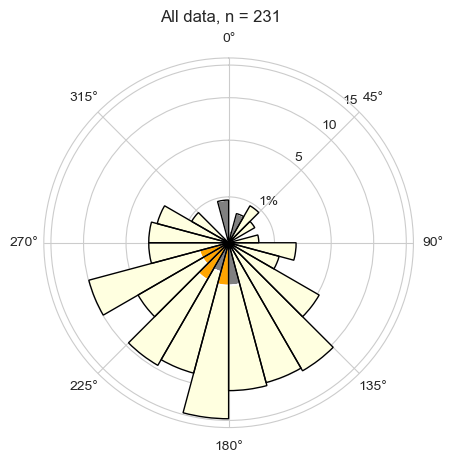

In [12]:
#### OVERBANK 

bin_int = 360/bins

fig= plt.figure()

## All data as base
directions = overbank.direction
bin_classes = []
binn = []
counts_tot = []
counts_perc = []
for x in range(bins):
    #Define bin limits:
    bin_classes.append(((x*bin_int),((x+1)*bin_int)))
    #Seperate the measurements into bins, using a ≤ x < b :
    binn.append(np.array([(directions[(directions >= (x)*bin_int) & (directions < (x+1)*bin_int)])]))
    #Count how many values in each bin, using a ≤ x < b :
    counts_tot.append(np.count_nonzero((directions >= (x)*bin_int) & (directions < (x+1)*bin_int))) 
#Convert number of counts to percentage of total counts in each bin:
for x in counts_tot:
    counts_perc.append(x/sum(counts_tot)*100)
### Plotting with equal area
### Ploting with dataset-dependent radius
### Calculate the unit radius (r_1%), depending on largest bin:
r_unit = max(counts_perc)/math.sqrt(max(counts_perc))
### Calculate radii corresponding to each bin, using r_f% = r_1% * f%^0.5:
radii = []
for x in counts_perc:
    radii.append(r_unit * math.sqrt(x))
### Define r or y axis tickmarks:
r_ticks = [r_unit]
r_tickslabels = ['1%']
r_ticksinterval = 5 #Sets the spacing between radius ticks
for x in range(0,int(max(counts_perc))+r_ticksinterval,r_ticksinterval):
    r_ticks.append(r_unit*math.sqrt(x))
    r_tickslabels.append(x)
theta = np.linspace(0.0, 2 * np.pi, bins, endpoint=False)+(np.pi/bins) #Last bracketed term sets of the bin starting point
width = (2*np.pi)/bins #Calculates bin width depending on number of bins
ax = plt.subplot(111, projection='polar')
ax.bar(theta, radii, width=width, bottom=0.0, fill=False, edgecolor='black', linewidth=1, zorder=10) #Plots equal-area
ax.set_theta_zero_location("N")  # theta=0 at the top
ax.set_theta_direction(-1)  # theta increasing clockwise
ax.set_yticks(r_ticks)
ax.set_yticklabels(r_tickslabels)
ax.set_rlabel_position(40)  # Move radial labels away from plotted line
plt.suptitle('All data, n = ' + str(len(directions)))

bottom = np.zeros(bins) #Set the starting point for the radial bars at origin (0.0)

## 0
directions = overbank_grooves.direction
# bin_classes = []
binn = []
counts = []
counts_perc = []
for x in range(bins):
#     #Define bin limits:
#     bin_classes.append(((x*bin_int),((x+1)*bin_int)))
    #Seperate the measurements into bins, using a ≤ x < b :
    binn.append(np.array([(directions[(directions >= (x)*bin_int) & (directions < (x+1)*bin_int)])]))
    #Count how many values in each bin, using a ≤ x < b :
    counts.append(np.count_nonzero((directions >= (x)*bin_int) & (directions < (x+1)*bin_int))) 
#Convert number of counts to percentage of total counts in each bin:
for x in counts:
    counts_perc.append(x/sum(counts_tot)*100)
### Plotting with equal area
### Ploting with dataset-dependent radius
### Calculate radii corresponding to each bin, using r_f% = r_1% * f%^0.5:
radii = []
for x in counts_perc:
    radii.append(r_unit * math.sqrt(x))
theta = np.linspace(0.0, 2 * np.pi, bins, endpoint=False)+(np.pi/bins) #Last bracketed term sets of the bin starting point
plt.bar(theta, radii, width=width, bottom=bottom, color = 'grey', alpha=1) #Plots equal-area
print('Grooves, n = ' + str(len(directions)))
bottom = radii #Set the starting point for the bars on top of previous class

## 1
directions = overbank_imbrications.direction
# bin_classes = []
binn = []
counts = []
counts_perc1 = []
for x in range(bins):
#     #Define bin limits:
#     bin_classes.append(((x*bin_int),((x+1)*bin_int)))
    #Seperate the measurements into bins, using a ≤ x < b :
    binn.append(np.array([(directions[(directions >= (x)*bin_int) & (directions < (x+1)*bin_int)])]))
    #Count how many values in each bin, using a ≤ x < b :
    counts.append(np.count_nonzero((directions >= (x)*bin_int) & (directions < (x+1)*bin_int))) 
#Convert number of counts to percentage of total counts in each bin:
for x in counts:
    counts_perc1.append(x/sum(counts_tot)*100)
counts_perc = [x + y for x, y in zip(counts_perc, counts_perc1)] #Calculate radius extent for this class by summing counts with previous classes
### Plotting with equal area
### Ploting with dataset-dependent radius
### Calculate radii corresponding to each bin, using r_f% = r_1% * f%^0.5:
radii1 = []
for x in counts_perc:
    radii1.append(r_unit * math.sqrt(x)) 
radii = [x - y for x, y in zip(radii1, radii)] #Calculate the radius to add to the bottom value for each bin, in order to plot to the true radius
theta = np.linspace(0.0, 2 * np.pi, bins, endpoint=False)+(np.pi/bins) #Last bracketed term sets of the bin starting point
plt.bar(theta, radii, width=width, bottom=bottom, color = 'orange', alpha = 1) #Plots equal-area
print('Ripples, n = ' + str(len(directions)))
bottom = radii1 #Set the starting point for the bars on top of previous class

## 2
directions = overbank_ripples.direction
# bin_classes = []
binn = []
counts = []
counts_perc1 = []
for x in range(bins):
#     #Define bin limits:
#     bin_classes.append(((x*bin_int),((x+1)*bin_int)))
    #Seperate the measurements into bins, using a ≤ x < b :
    binn.append(np.array([(directions[(directions >= (x)*bin_int) & (directions < (x+1)*bin_int)])]))
    #Count how many values in each bin, using a ≤ x < b :
    counts.append(np.count_nonzero((directions >= (x)*bin_int) & (directions < (x+1)*bin_int))) 
#Convert number of counts to percentage of total counts in each bin:
for x in counts:
    counts_perc1.append(x/sum(counts_tot)*100)
counts_perc = [x + y for x, y in zip(counts_perc, counts_perc1)] #Calculate radius extent for this class by summing counts with previous classes
### Plotting with equal area
### Ploting with dataset-dependent radius
### Calculate radii corresponding to each bin, using r_f% = r_1% * f%^0.5:
radii2 = []
for x in counts_perc:
    radii2.append(r_unit * math.sqrt(x)) 
radii = [x - y for x, y in zip(radii2, radii1)] #Calculate the radius to add to the bottom value for each bin, in order to plot to the true radius
theta = np.linspace(0.0, 2 * np.pi, bins, endpoint=False)+(np.pi/bins) #Last bracketed term sets of the bin starting point
plt.bar(theta, radii, width=width, bottom=bottom, color = 'lightyellow', alpha = 1) #Plots equal-area
print('Imbrication, n = ' + str(len(directions)))
bottom = radii2 #Set the starting point for the bars on top of previous class




plt.show()
fig.savefig('figs/pb_palaeocurrents_overbank.eps')

Grooves, n = 6
Ripples, n = 39


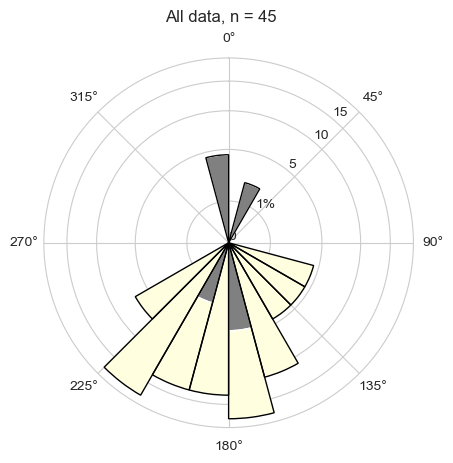

In [9]:
#### OVERBANK A 

bin_int = 360/bins

fig= plt.figure()

## All data as base
directions = overbank_A.direction
bin_classes = []
binn = []
counts_tot = []
counts_perc = []
for x in range(bins):
    #Define bin limits:
    bin_classes.append(((x*bin_int),((x+1)*bin_int)))
    #Seperate the measurements into bins, using a ≤ x < b :
    binn.append(np.array([(directions[(directions >= (x)*bin_int) & (directions < (x+1)*bin_int)])]))
    #Count how many values in each bin, using a ≤ x < b :
    counts_tot.append(np.count_nonzero((directions >= (x)*bin_int) & (directions < (x+1)*bin_int))) 
#Convert number of counts to percentage of total counts in each bin:
for x in counts_tot:
    counts_perc.append(x/sum(counts_tot)*100)
### Plotting with equal area
### Ploting with dataset-dependent radius
### Calculate the unit radius (r_1%), depending on largest bin:
r_unit = max(counts_perc)/math.sqrt(max(counts_perc))
### Calculate radii corresponding to each bin, using r_f% = r_1% * f%^0.5:
radii = []
for x in counts_perc:
    radii.append(r_unit * math.sqrt(x))
### Define r or y axis tickmarks:
r_ticks = [r_unit]
r_tickslabels = ['1%']
r_ticksinterval = 5 #Sets the spacing between radius ticks
for x in range(0,int(max(counts_perc))+r_ticksinterval,r_ticksinterval):
    r_ticks.append(r_unit*math.sqrt(x))
    r_tickslabels.append(x)
theta = np.linspace(0.0, 2 * np.pi, bins, endpoint=False)+(np.pi/bins) #Last bracketed term sets of the bin starting point
width = (2*np.pi)/bins #Calculates bin width depending on number of bins
ax = plt.subplot(111, projection='polar')
ax.bar(theta, radii, width=width, bottom=0.0, fill=False, edgecolor='black', linewidth=1, zorder=10) #Plots equal-area
ax.set_theta_zero_location("N")  # theta=0 at the top
ax.set_theta_direction(-1)  # theta increasing clockwise
ax.set_yticks(r_ticks)
ax.set_yticklabels(r_tickslabels)
ax.set_rlabel_position(40)  # Move radial labels away from plotted line
plt.suptitle('All data, n = ' + str(len(directions)))

bottom = np.zeros(bins) #Set the starting point for the radial bars at origin (0.0)

## 1
directions = overbank_A_grooves.direction
# bin_classes = []
binn = []
counts = []
counts_perc = []
for x in range(bins):
#     #Define bin limits:
#     bin_classes.append(((x*bin_int),((x+1)*bin_int)))
    #Seperate the measurements into bins, using a ≤ x < b :
    binn.append(np.array([(directions[(directions >= (x)*bin_int) & (directions < (x+1)*bin_int)])]))
    #Count how many values in each bin, using a ≤ x < b :
    counts.append(np.count_nonzero((directions >= (x)*bin_int) & (directions < (x+1)*bin_int))) 
#Convert number of counts to percentage of total counts in each bin:
for x in counts:
    counts_perc.append(x/sum(counts_tot)*100)
### Plotting with equal area
### Ploting with dataset-dependent radius
### Calculate radii corresponding to each bin, using r_f% = r_1% * f%^0.5:
radii = []
for x in counts_perc:
    radii.append(r_unit * math.sqrt(x))
theta = np.linspace(0.0, 2 * np.pi, bins, endpoint=False)+(np.pi/bins) #Last bracketed term sets of the bin starting point
plt.bar(theta, radii, width=width, bottom=bottom, color = 'grey', alpha=1) #Plots equal-area
print('Grooves, n = ' + str(len(directions)))
bottom = radii #Set the starting point for the bars on top of previous class

## 2
directions = overbank_A_ripples.direction
# bin_classes = []
binn = []
counts = []
counts_perc1 = []
for x in range(bins):
#     #Define bin limits:
#     bin_classes.append(((x*bin_int),((x+1)*bin_int)))
    #Seperate the measurements into bins, using a ≤ x < b :
    binn.append(np.array([(directions[(directions >= (x)*bin_int) & (directions < (x+1)*bin_int)])]))
    #Count how many values in each bin, using a ≤ x < b :
    counts.append(np.count_nonzero((directions >= (x)*bin_int) & (directions < (x+1)*bin_int))) 
#Convert number of counts to percentage of total counts in each bin:
for x in counts:
    counts_perc1.append(x/sum(counts_tot)*100)
counts_perc = [x + y for x, y in zip(counts_perc, counts_perc1)] #Calculate radius extent for this class by summing counts with previous classes
### Plotting with equal area
### Ploting with dataset-dependent radius
### Calculate radii corresponding to each bin, using r_f% = r_1% * f%^0.5:
radii1 = []
for x in counts_perc:
    radii1.append(r_unit * math.sqrt(x)) 
radii = [x - y for x, y in zip(radii1, radii)] #Calculate the radius to add to the bottom value for each bin, in order to plot to the true radius
theta = np.linspace(0.0, 2 * np.pi, bins, endpoint=False)+(np.pi/bins) #Last bracketed term sets of the bin starting point
plt.bar(theta, radii, width=width, bottom=bottom, color = 'lightyellow', alpha = 1) #Plots equal-area
print('Ripples, n = ' + str(len(directions)))
bottom = radii1 #Set the starting point for the bars on top of previous class


plt.show()
fig.savefig('figs/pb_palaeocurrents_overbank_A.eps')

Grooves, n = 2
Ripples, n = 55


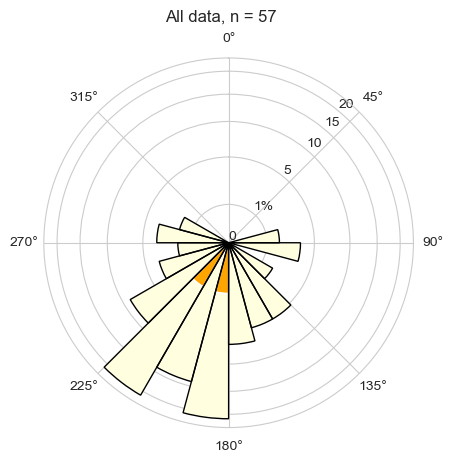

In [10]:
#### OVERBANK B 

bin_int = 360/bins

fig= plt.figure()

## All data as base
directions = overbank_B.direction
bin_classes = []
binn = []
counts_tot = []
counts_perc = []
for x in range(bins):
    #Define bin limits:
    bin_classes.append(((x*bin_int),((x+1)*bin_int)))
    #Seperate the measurements into bins, using a ≤ x < b :
    binn.append(np.array([(directions[(directions >= (x)*bin_int) & (directions < (x+1)*bin_int)])]))
    #Count how many values in each bin, using a ≤ x < b :
    counts_tot.append(np.count_nonzero((directions >= (x)*bin_int) & (directions < (x+1)*bin_int))) 
#Convert number of counts to percentage of total counts in each bin:
for x in counts_tot:
    counts_perc.append(x/sum(counts_tot)*100)
### Plotting with equal area
### Ploting with dataset-dependent radius
### Calculate the unit radius (r_1%), depending on largest bin:
r_unit = max(counts_perc)/math.sqrt(max(counts_perc))
### Calculate radii corresponding to each bin, using r_f% = r_1% * f%^0.5:
radii = []
for x in counts_perc:
    radii.append(r_unit * math.sqrt(x))
### Define r or y axis tickmarks:
r_ticks = [r_unit]
r_tickslabels = ['1%']
r_ticksinterval = 5 #Sets the spacing between radius ticks
for x in range(0,int(max(counts_perc))+r_ticksinterval,r_ticksinterval):
    r_ticks.append(r_unit*math.sqrt(x))
    r_tickslabels.append(x)
theta = np.linspace(0.0, 2 * np.pi, bins, endpoint=False)+(np.pi/bins) #Last bracketed term sets of the bin starting point
width = (2*np.pi)/bins #Calculates bin width depending on number of bins
ax = plt.subplot(111, projection='polar')
ax.bar(theta, radii, width=width, bottom=0.0, fill=False, edgecolor='black', linewidth=1, zorder=10) #Plots equal-area
ax.set_theta_zero_location("N")  # theta=0 at the top
ax.set_theta_direction(-1)  # theta increasing clockwise
ax.set_yticks(r_ticks)
ax.set_yticklabels(r_tickslabels)
ax.set_rlabel_position(40)  # Move radial labels away from plotted line
plt.suptitle('All data, n = ' + str(len(directions)))

bottom = np.zeros(bins) #Set the starting point for the radial bars at origin (0.0)

## 1
directions = overbank_B_imbrication.direction
# bin_classes = []
binn = []
counts = []
counts_perc = []
for x in range(bins):
#     #Define bin limits:
#     bin_classes.append(((x*bin_int),((x+1)*bin_int)))
    #Seperate the measurements into bins, using a ≤ x < b :
    binn.append(np.array([(directions[(directions >= (x)*bin_int) & (directions < (x+1)*bin_int)])]))
    #Count how many values in each bin, using a ≤ x < b :
    counts.append(np.count_nonzero((directions >= (x)*bin_int) & (directions < (x+1)*bin_int))) 
#Convert number of counts to percentage of total counts in each bin:
for x in counts:
    counts_perc.append(x/sum(counts_tot)*100)
### Plotting with equal area
### Ploting with dataset-dependent radius
### Calculate radii corresponding to each bin, using r_f% = r_1% * f%^0.5:
radii = []
for x in counts_perc:
    radii.append(r_unit * math.sqrt(x))
theta = np.linspace(0.0, 2 * np.pi, bins, endpoint=False)+(np.pi/bins) #Last bracketed term sets of the bin starting point
plt.bar(theta, radii, width=width, bottom=bottom, color = 'orange', alpha=1) #Plots equal-area
print('Grooves, n = ' + str(len(directions)))
bottom = radii #Set the starting point for the bars on top of previous class

## 2
directions = overbank_B_ripples.direction
# bin_classes = []
binn = []
counts = []
counts_perc1 = []
for x in range(bins):
#     #Define bin limits:
#     bin_classes.append(((x*bin_int),((x+1)*bin_int)))
    #Seperate the measurements into bins, using a ≤ x < b :
    binn.append(np.array([(directions[(directions >= (x)*bin_int) & (directions < (x+1)*bin_int)])]))
    #Count how many values in each bin, using a ≤ x < b :
    counts.append(np.count_nonzero((directions >= (x)*bin_int) & (directions < (x+1)*bin_int))) 
#Convert number of counts to percentage of total counts in each bin:
for x in counts:
    counts_perc1.append(x/sum(counts_tot)*100)
counts_perc = [x + y for x, y in zip(counts_perc, counts_perc1)] #Calculate radius extent for this class by summing counts with previous classes
### Plotting with equal area
### Ploting with dataset-dependent radius
### Calculate radii corresponding to each bin, using r_f% = r_1% * f%^0.5:
radii1 = []
for x in counts_perc:
    radii1.append(r_unit * math.sqrt(x)) 
radii = [x - y for x, y in zip(radii1, radii)] #Calculate the radius to add to the bottom value for each bin, in order to plot to the true radius
theta = np.linspace(0.0, 2 * np.pi, bins, endpoint=False)+(np.pi/bins) #Last bracketed term sets of the bin starting point
plt.bar(theta, radii, width=width, bottom=bottom, color = 'lightyellow', alpha = 1) #Plots equal-area
print('Ripples, n = ' + str(len(directions)))
bottom = radii1 #Set the starting point for the bars on top of previous class


plt.show()
fig.savefig('figs/pb_palaeocurrents_overbank_B.eps')

Grooves, n = 4
Ripples, n = 134


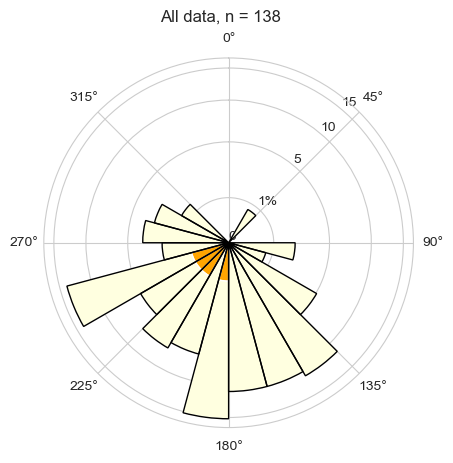

In [11]:
#### OVERBANK C 

bin_int = 360/bins

fig= plt.figure()

## All data as base
directions = overbank_C.direction
bin_classes = []
binn = []
counts_tot = []
counts_perc = []
for x in range(bins):
    #Define bin limits:
    bin_classes.append(((x*bin_int),((x+1)*bin_int)))
    #Seperate the measurements into bins, using a ≤ x < b :
    binn.append(np.array([(directions[(directions >= (x)*bin_int) & (directions < (x+1)*bin_int)])]))
    #Count how many values in each bin, using a ≤ x < b :
    counts_tot.append(np.count_nonzero((directions >= (x)*bin_int) & (directions < (x+1)*bin_int))) 
#Convert number of counts to percentage of total counts in each bin:
for x in counts_tot:
    counts_perc.append(x/sum(counts_tot)*100)
### Plotting with equal area
### Ploting with dataset-dependent radius
### Calculate the unit radius (r_1%), depending on largest bin:
r_unit = max(counts_perc)/math.sqrt(max(counts_perc))
### Calculate radii corresponding to each bin, using r_f% = r_1% * f%^0.5:
radii = []
for x in counts_perc:
    radii.append(r_unit * math.sqrt(x))
### Define r or y axis tickmarks:
r_ticks = [r_unit]
r_tickslabels = ['1%']
r_ticksinterval = 5 #Sets the spacing between radius ticks
for x in range(0,int(max(counts_perc))+r_ticksinterval,r_ticksinterval):
    r_ticks.append(r_unit*math.sqrt(x))
    r_tickslabels.append(x)
theta = np.linspace(0.0, 2 * np.pi, bins, endpoint=False)+(np.pi/bins) #Last bracketed term sets of the bin starting point
width = (2*np.pi)/bins #Calculates bin width depending on number of bins
ax = plt.subplot(111, projection='polar')
ax.bar(theta, radii, width=width, bottom=0.0, fill=False, edgecolor='black', linewidth=1, zorder=10) #Plots equal-area
ax.set_theta_zero_location("N")  # theta=0 at the top
ax.set_theta_direction(-1)  # theta increasing clockwise
ax.set_yticks(r_ticks)
ax.set_yticklabels(r_tickslabels)
ax.set_rlabel_position(40)  # Move radial labels away from plotted line
plt.suptitle('All data, n = ' + str(len(directions)))

bottom = np.zeros(bins) #Set the starting point for the radial bars at origin (0.0)

## 1
directions = overbank_C_imbrication.direction
# bin_classes = []
binn = []
counts = []
counts_perc = []
for x in range(bins):
#     #Define bin limits:
#     bin_classes.append(((x*bin_int),((x+1)*bin_int)))
    #Seperate the measurements into bins, using a ≤ x < b :
    binn.append(np.array([(directions[(directions >= (x)*bin_int) & (directions < (x+1)*bin_int)])]))
    #Count how many values in each bin, using a ≤ x < b :
    counts.append(np.count_nonzero((directions >= (x)*bin_int) & (directions < (x+1)*bin_int))) 
#Convert number of counts to percentage of total counts in each bin:
for x in counts:
    counts_perc.append(x/sum(counts_tot)*100)
### Plotting with equal area
### Ploting with dataset-dependent radius
### Calculate radii corresponding to each bin, using r_f% = r_1% * f%^0.5:
radii = []
for x in counts_perc:
    radii.append(r_unit * math.sqrt(x))
theta = np.linspace(0.0, 2 * np.pi, bins, endpoint=False)+(np.pi/bins) #Last bracketed term sets of the bin starting point
plt.bar(theta, radii, width=width, bottom=bottom, color = 'orange', alpha=1) #Plots equal-area
print('Grooves, n = ' + str(len(directions)))
bottom = radii #Set the starting point for the bars on top of previous class

## 2
directions = overbank_C_ripples.direction
# bin_classes = []
binn = []
counts = []
counts_perc1 = []
for x in range(bins):
#     #Define bin limits:
#     bin_classes.append(((x*bin_int),((x+1)*bin_int)))
    #Seperate the measurements into bins, using a ≤ x < b :
    binn.append(np.array([(directions[(directions >= (x)*bin_int) & (directions < (x+1)*bin_int)])]))
    #Count how many values in each bin, using a ≤ x < b :
    counts.append(np.count_nonzero((directions >= (x)*bin_int) & (directions < (x+1)*bin_int))) 
#Convert number of counts to percentage of total counts in each bin:
for x in counts:
    counts_perc1.append(x/sum(counts_tot)*100)
counts_perc = [x + y for x, y in zip(counts_perc, counts_perc1)] #Calculate radius extent for this class by summing counts with previous classes
### Plotting with equal area
### Ploting with dataset-dependent radius
### Calculate radii corresponding to each bin, using r_f% = r_1% * f%^0.5:
radii1 = []
for x in counts_perc:
    radii1.append(r_unit * math.sqrt(x)) 
radii = [x - y for x, y in zip(radii1, radii)] #Calculate the radius to add to the bottom value for each bin, in order to plot to the true radius
theta = np.linspace(0.0, 2 * np.pi, bins, endpoint=False)+(np.pi/bins) #Last bracketed term sets of the bin starting point
plt.bar(theta, radii, width=width, bottom=bottom, color = 'lightyellow', alpha = 1) #Plots equal-area
print('Ripples, n = ' + str(len(directions)))
bottom = radii1 #Set the starting point for the bars on top of previous class


plt.show()
fig.savefig('figs/pb_palaeocurrents_overbank_C.eps')